# 決定木

意味解釈可能性（得られた結果の意味を解釈しやすいかどうか）に配慮する場合に魅力的なモデル。
一連の質問に基づいて決断を下すという方法によりデータを分類するモデルであると考えられる。

In [6]:
# ジニ不純度の関数を定義
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1 - p))

In [7]:
# エントロピーの関数を定義
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

In [8]:
# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

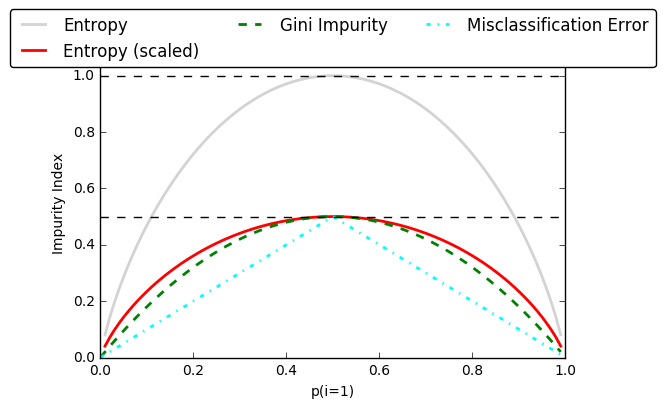

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import lib
%matplotlib inline

# 確率を表す配列を生成 (0〜0.99まで0.01刻み)
x = np.arange(0.0, 1.0, 0.01)
# エントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

# 図の作成
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                                   ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                                   ['-', '-', '--', '-.'],
                                   ['lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)

# 2本の水平の破線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

# 上限/下限の設定
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()


In [10]:
# Irisデータの読み込み
import lib
X_train, X_test, _, _, y_train, y_test = lib.load_iris_data()

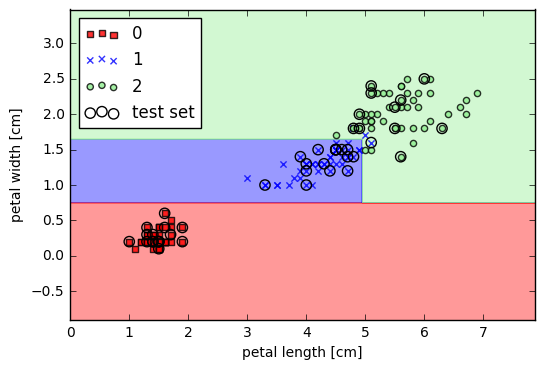

In [12]:
# 決定木の構築
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

lib.plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()
# 決定木特有として、軸に平行なけっていｋ